# code to display gather results alone, w/o mapping

In [1]:
%matplotlib inline
import pylab
import numpy

In [2]:
import csv
def load_csv(filename, key):
    rows = {}
    with open(filename, 'rt') as fp:
        r = csv.DictReader(fp)
        for row in r:
            k = row[key]
            rows[k] = row
    return rows

## load gather CSV

In [3]:
sample_id = 'SRR606249'
gather_csv_raw = load_csv(f'outputs/{sample_id}.gather.csv', 'name')

def fix_name(x):
    return "_".join(x.split('_')[:2]).split('.')[0]

gather_csv = {}
for k in gather_csv_raw:
    genome_id = fix_name(k)
    gather_csv[genome_id] = gather_csv_raw[k]

In [4]:
import pprint
genome_id = next(iter(gather_csv.keys()))
pprint.pprint(gather_csv[genome_id])

OrderedDict([('intersect_bp', '9323000'),
             ('f_orig_query', '0.024885023876063346'),
             ('f_match', '0.9772536687631027'),
             ('f_unique_to_query', '0.024885023876063346'),
             ('f_unique_weighted', '0.008648987027130522'),
             ('average_abund', '6.8318137938431835'),
             ('median_abund', '6.0'),
             ('std_abund', '5.847358352517044'),
             ('name', 'GCA_000013645.1_ASM1364v1_genomic.fna.gz'),
             ('filename', 'all-gather-genomes.sbt.zip'),
             ('md5', 'ee9cb05018009af43429e83e7d502a0a'),
             ('f_match_orig', '0.9772536687631027'),
             ('unique_intersect_bp', '9323000'),
             ('gather_result_rank', '0')])


In [5]:
total_hashes = 0
for n, genome_id in enumerate(gather_csv):
    total_hashes += int(gather_csv[genome_id]['unique_intersect_bp']) # XXX @CTB unique_intersect_bp
    
print(f'total hashes identified: {total_hashes:e}')

total hashes identified: 2.041820e+08


# fig 1: fraction of hashes unique to query, in order of gather results

Text(0, 0.5, 'f_unique_to_query, as %')

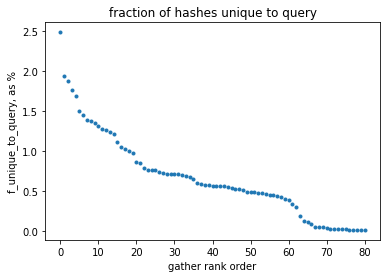

In [6]:
x = []
y1 = []
for n, genome_id in enumerate(gather_csv):
    f_match = float(gather_csv[genome_id]['f_unique_to_query']) * 100
    x.append(n)
    y1.append(f_match)

pylab.plot(x, y1, '.')
pylab.title('fraction of hashes unique to query')
pylab.xlabel('gather rank order')
pylab.ylabel('f_unique_to_query, as %')

## fig 2: sum identified hashes, in order of gather

conclusion: across the gather run, total hashes identified correlate well with total bp mapped

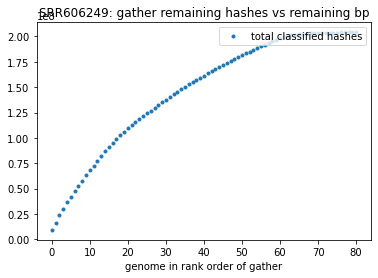

In [7]:
hash_x = []
hash_n_ident = []
hash_n_classified = []
hash_n_ident_all = []

sofar = 0
for n, genome_id in enumerate(gather_csv):
    n_hashes = int(gather_csv[genome_id]['unique_intersect_bp']) # XXX @CTB unique_intersect_bp
    sofar += n_hashes
    hash_x.append(n)
    hash_n_ident.append(n_hashes)
    hash_n_classified.append(sofar)
    
    all_hashes = int(gather_csv[genome_id]['intersect_bp'])
    hash_n_ident_all.append(all_hashes)
    
hash_n_ident = numpy.array(hash_n_ident)
hash_n_ident_all = numpy.array(hash_n_ident_all)

hash_n_ident = hash_n_ident / 1e6
hash_n_ident_all = hash_n_ident_all / 1e6

pylab.plot(hash_x, hash_n_classified, '.', label='total classified hashes')

pylab.xlabel('genome in rank order of gather')
pylab.legend(loc='upper right')
pylab.title(f'{sample_id}: gather remaining hashes vs remaining bp')
pylab.savefig(f'/tmp/gather-{sample_id}.pdf')

## fig 3: difference between hashes and bp, per sample

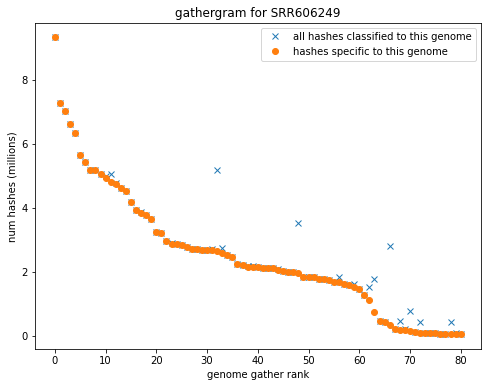

In [9]:
#pylab.style.use('ggplot')
pylab.figure(num=None, figsize=(8, 6))

pylab.plot(hash_x, hash_n_ident_all, 'x', label='all hashes classified to this genome')
pylab.plot(hash_x, hash_n_ident, 'o', label='hashes specific to this genome')

pylab.xlabel('genome gather rank')
#pylab.ylabel('difference: hashcount - mapped bp')
pylab.ylabel('num hashes (millions)')
pylab.legend(loc='upper right')
pylab.title(f'gathergram for {sample_id}')
pylab.savefig(f'/tmp/gathergram-{sample_id}.pdf')
pylab.savefig(f'/tmp/gathergram-{sample_id}.svg')
pylab.savefig(f'/tmp/gathergram-{sample_id}.png')